In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', parser= 'auto')

In [39]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X = mnist.data
y = mnist.target.astype('int')

from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
X_pca = pca.fit_transform(X)
X_pca.shape

(70000, 2)

In [41]:
X_pca

array([[ 122.26110146, -316.15320908],
       [1010.49512585, -289.95506057],
       [ -58.9956425 ,  393.71200028],
       ...,
       [-271.50590536,  590.09036283],
       [-310.22826056, -116.76343988],
       [1058.86240938,  -83.40545089]])

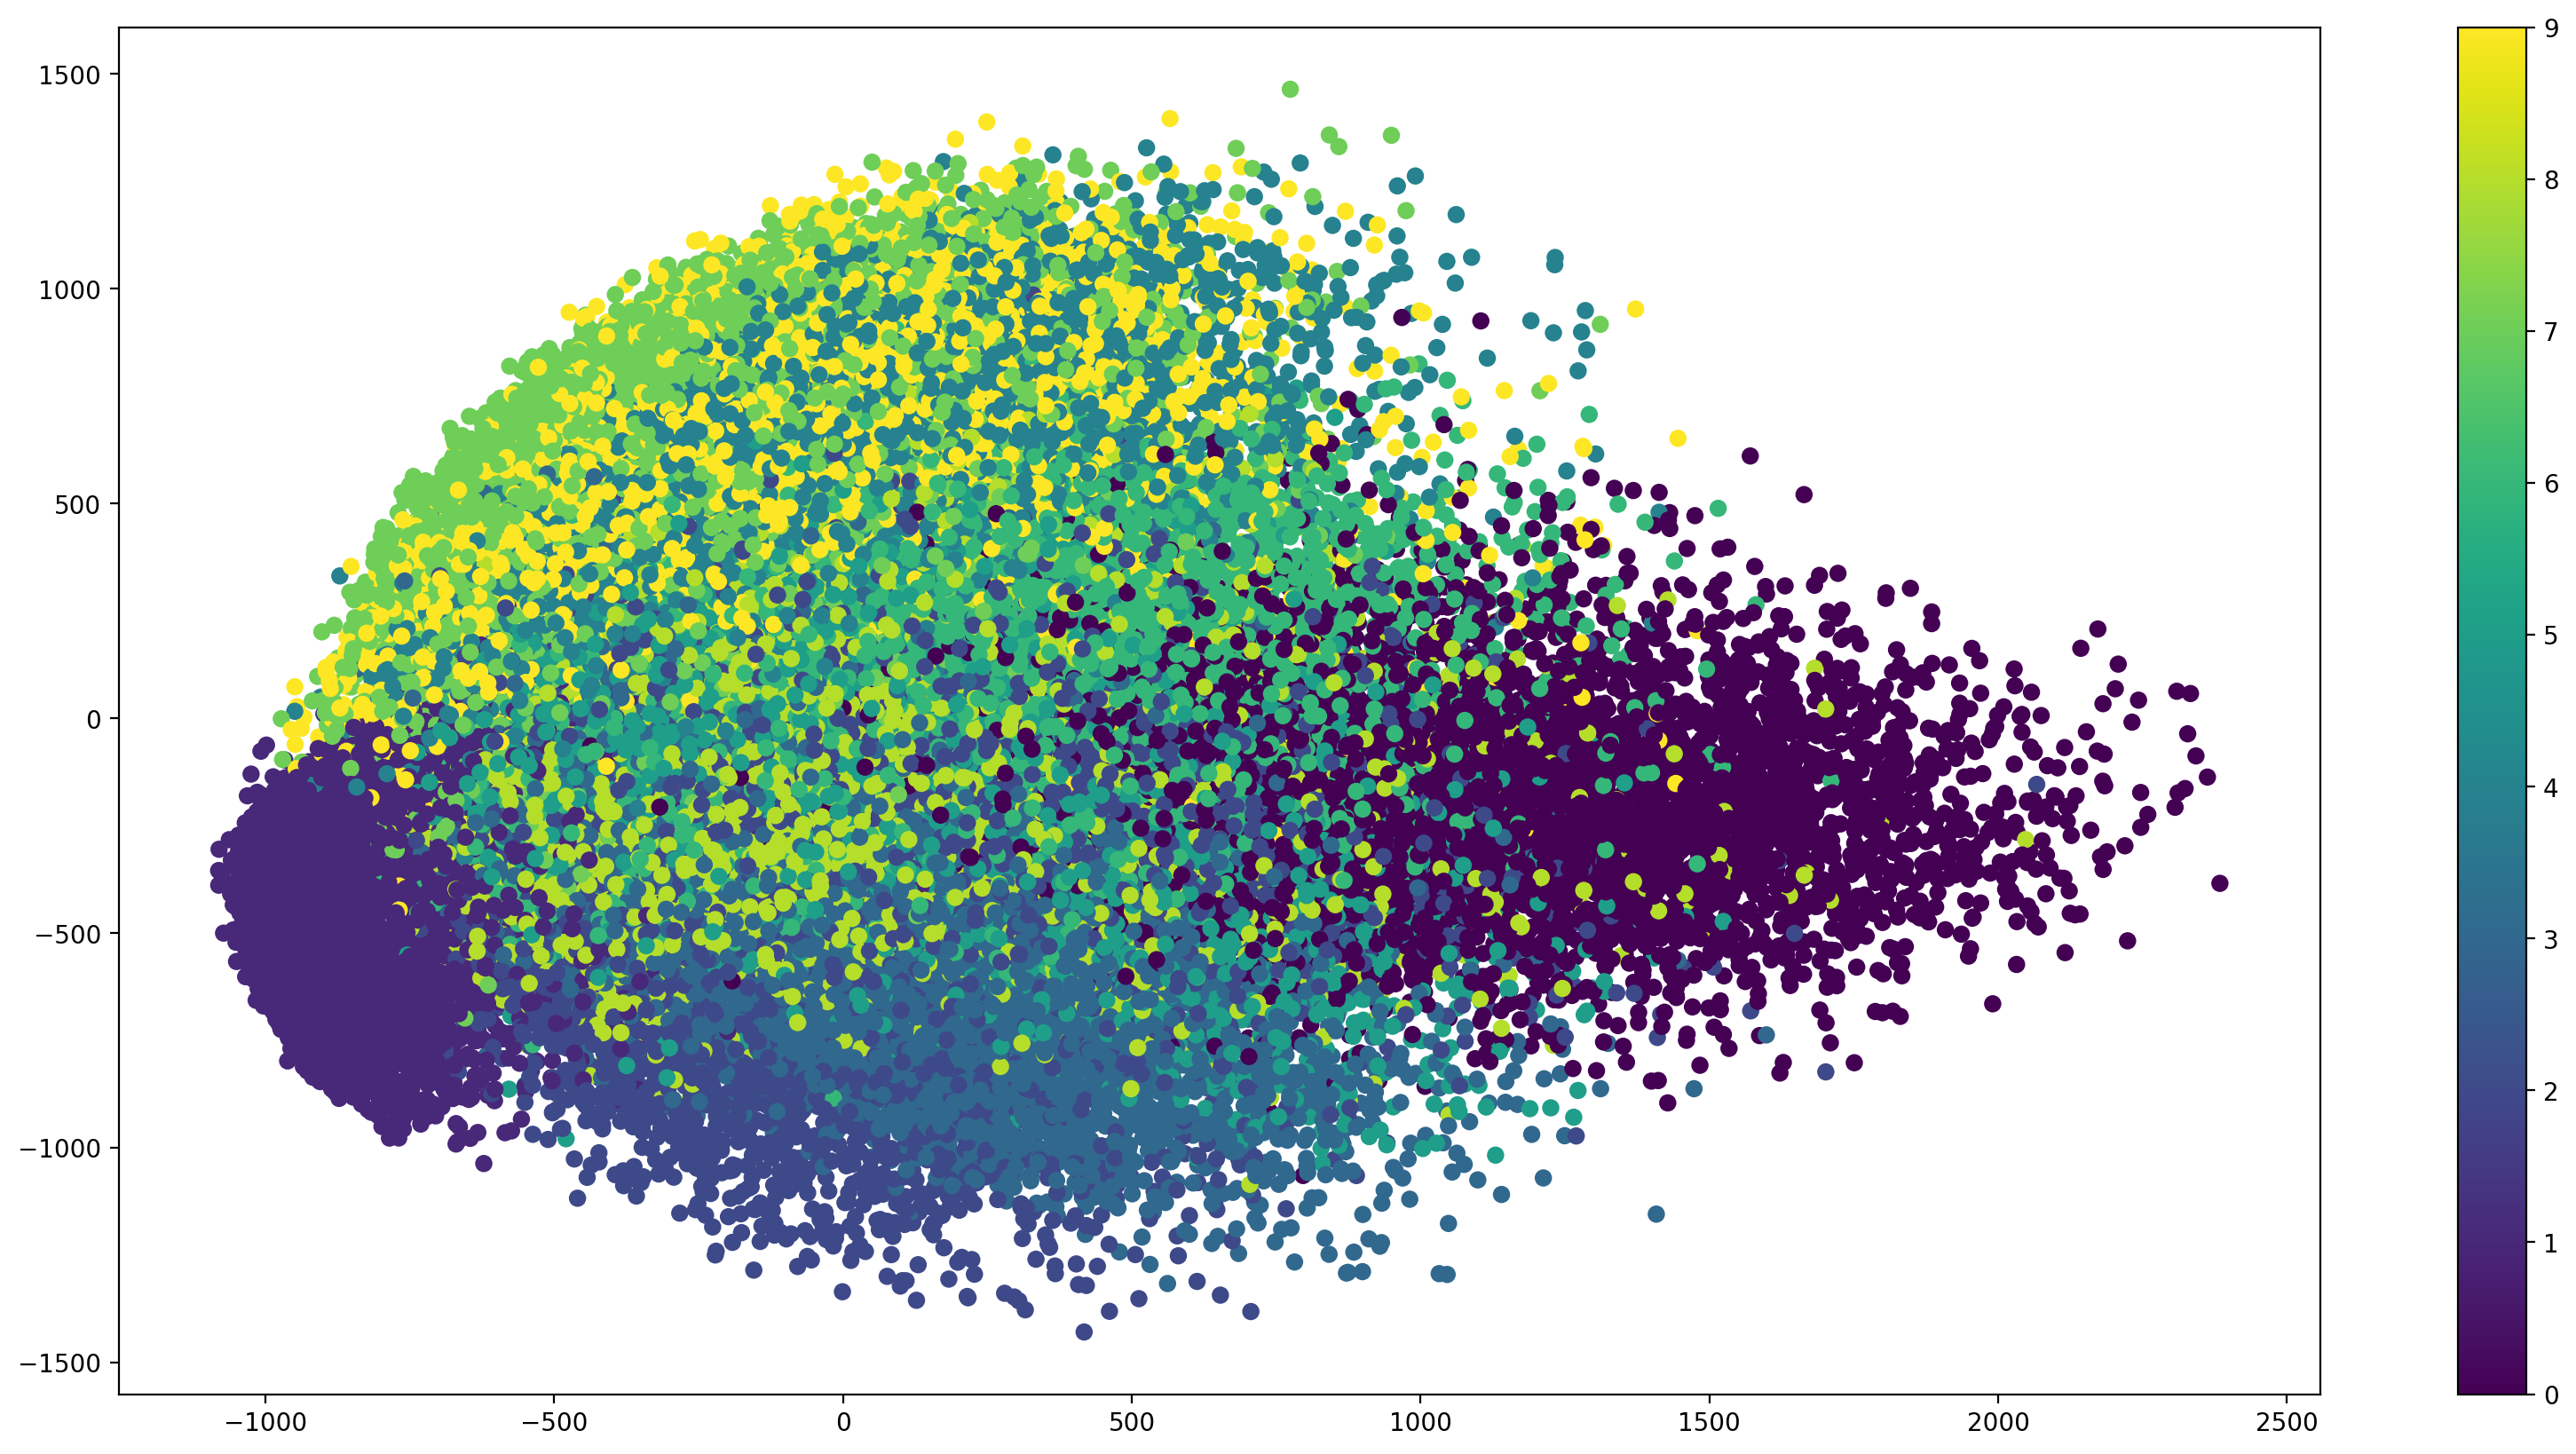

In [42]:
plt.figure(figsize=(20,10), dpi= 200)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= y)
plt.colorbar()
plt.show()

In [43]:
X_recovered = pca.inverse_transform(X_pca)
X_recovered.shape

(70000, 784)

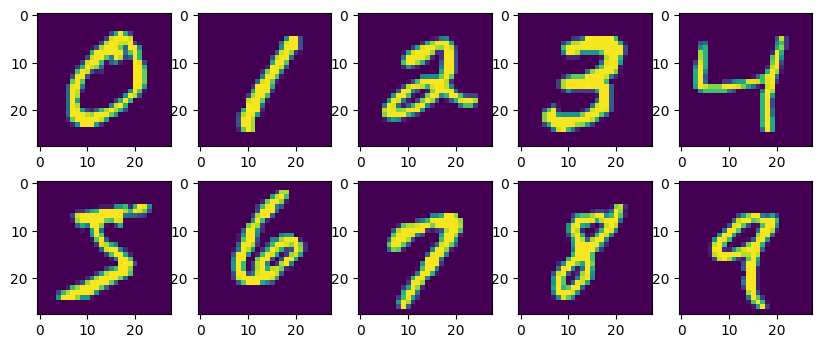

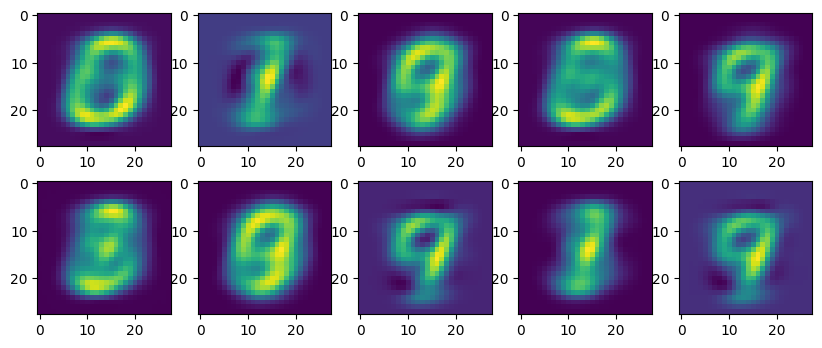

In [44]:
digits = y.unique()
digits.sort()
plt.figure(figsize=(10, 4))
for i in digits:
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[y==i].iloc[0].to_numpy().reshape(28, 28))

plt.figure(figsize=(10, 4))
for i in digits:
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_recovered[y==i][0].reshape(28, 28))

In [52]:
pca = PCA(n_components= 300)
pca.fit(X)
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467594,
       0.00454369, 0.00444918, 0.00418217, 0.00396164, 0.00383708,
       0.00375785, 0.00361426, 0.00349025, 0.00338732, 0.00319696,
       0.00316854, 0.00310145, 0.0029648 , 0.00287101, 0.00282514,
       0.00269423, 0.00268392, 0.00256509, 0.00253168, 0.00244648,
       0.00239702, 0.00238581, 0.00229234, 0.00220949, 0.0021306 ,
       0.00206317, 0.00202781, 0.00195035, 0.00191471, 0.0018855 ,
       0.00186976, 0.00180104, 0.00176787, 0.00173359, 0.00164

95% of the information is at 153 component


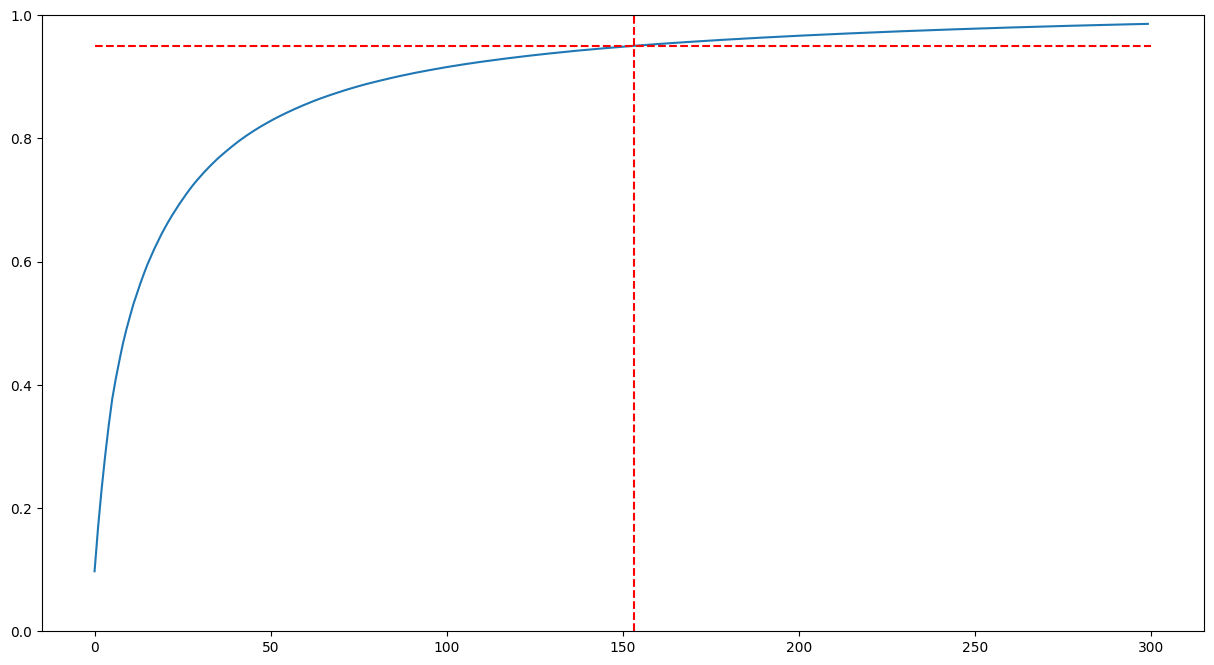

In [53]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
idx = (cumsum <=0.95).sum()
print(f'95% of the information is at {idx} component')
plt.figure(figsize=(15, 8))
plt.plot(cumsum)
plt.plot([0, 300], [0.95, 0.95], 'r--')
plt.plot([153, 153], [0, 1], 'r--')
plt.ylim([0, 1])
plt.show()

In [47]:
pca = PCA(n_components= idx)
pca.fit(X)
pca.explained_variance_ratio_.sum()

0.949468382104844

In [48]:
X_pca = pca.transform(X)
X_pca.shape

(70000, 153)

In [49]:
X_recovered = pca.inverse_transform(X_pca)
X_recovered.shape

(70000, 784)

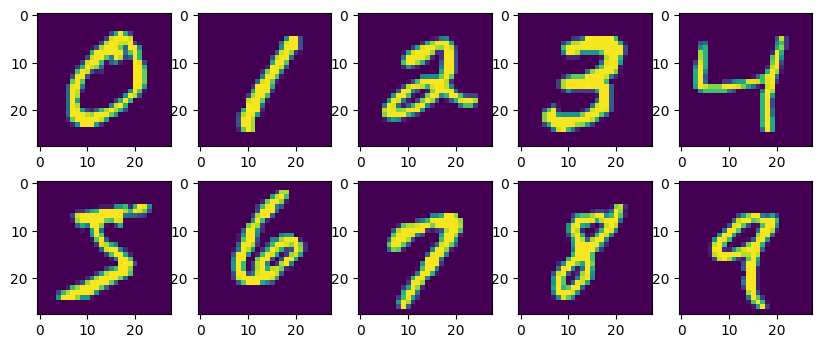

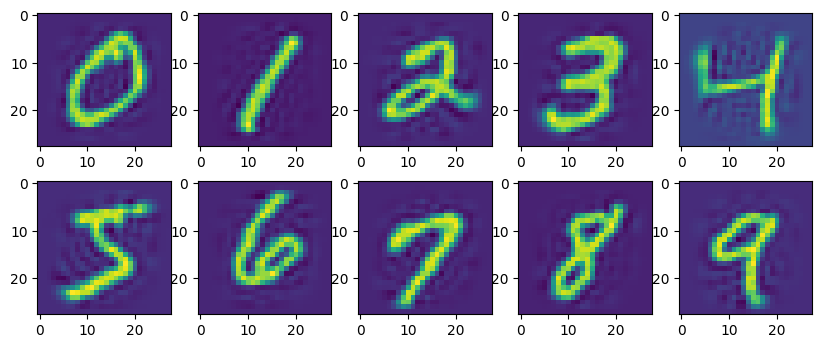

In [50]:
plt.figure(figsize=(10, 4))
for i in digits:
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[y==i].iloc[0].to_numpy().reshape(28, 28))

plt.figure(figsize=(10, 4))
for i in digits:
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_recovered[y==i][0].reshape(28, 28))